# Data exploration + preprocess

In [4]:
%load_ext autoreload
%autoreload 2
import data
from data_prepro import na_month_plot_bypermno
from data_prepro import na_meanfill

import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df = data.load_process()

Loading stock parquet
Loading VIX parquet.


In [6]:
#Permnos
print("Shape:",df.shape)
print("Unique permnos:", len(df['permno'].unique()))

Shape: (2646081, 25)
Unique permnos: 1063


# Missing values

Dropping missing tickers

In [7]:
# Drop missing tikcer since they are nearing mbrenddt
df_pro = df.dropna(subset = ['ticker'])

## Investigating missing `vol` 

In [18]:
df_pro[df_pro['vol'].isna()]

,permno,ticker,vol,ret,shrout,prc,askhi,bidlo,gsector,mktrf,smb,hml,rmw,umd,cma,rf,mbrstartdt,mbrenddt,put_volume,call_volume,put_call_ratio,gsector_name,Enhanced Investor Sentiment Index (STV),vix_close,News Sentiment


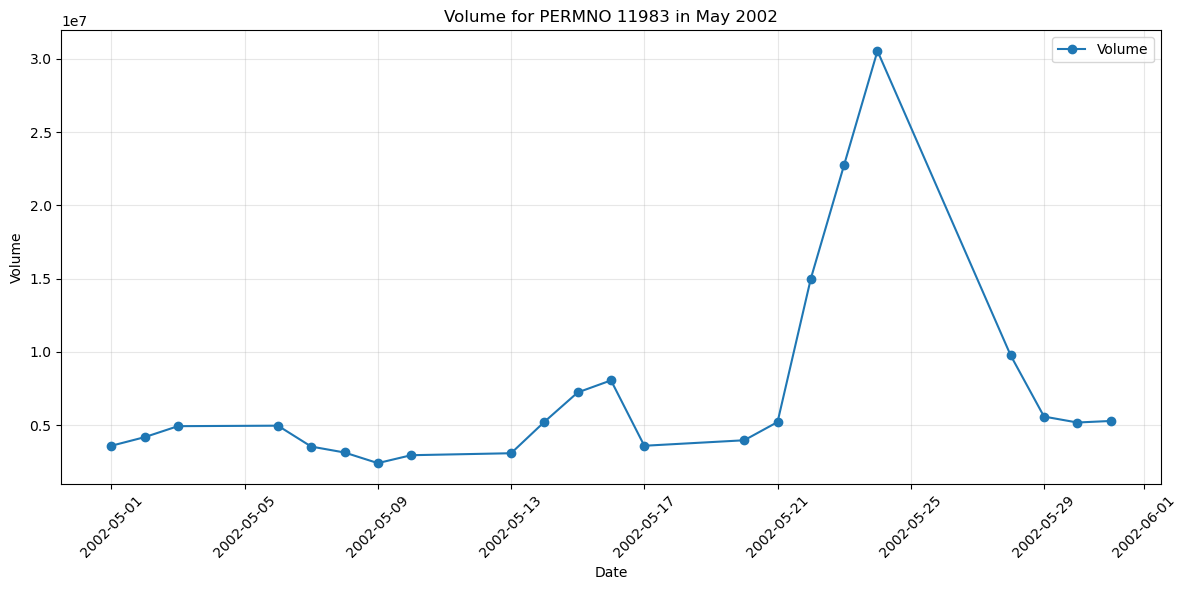

In [19]:
na_month_plot_bypermno(11983,2002,5,df_pro)

Probably good to take the mean between the dates before and after for 11983

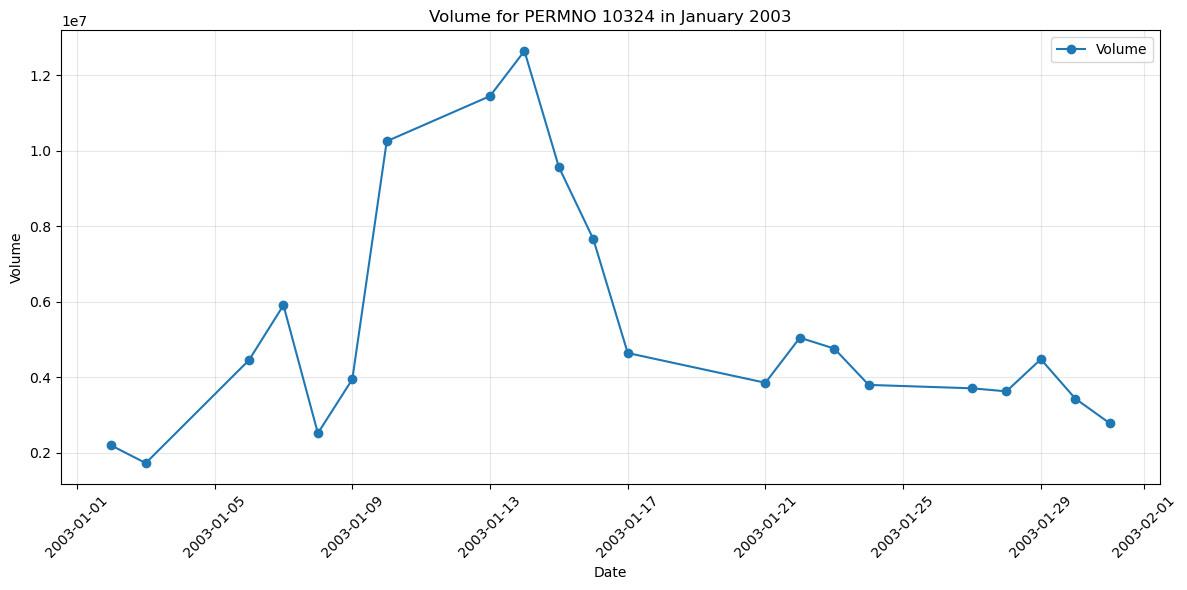

In [20]:
na_month_plot_bypermno(10324,2003,1,df_pro)

Probably good to take the mean between the dates before and after for 10324

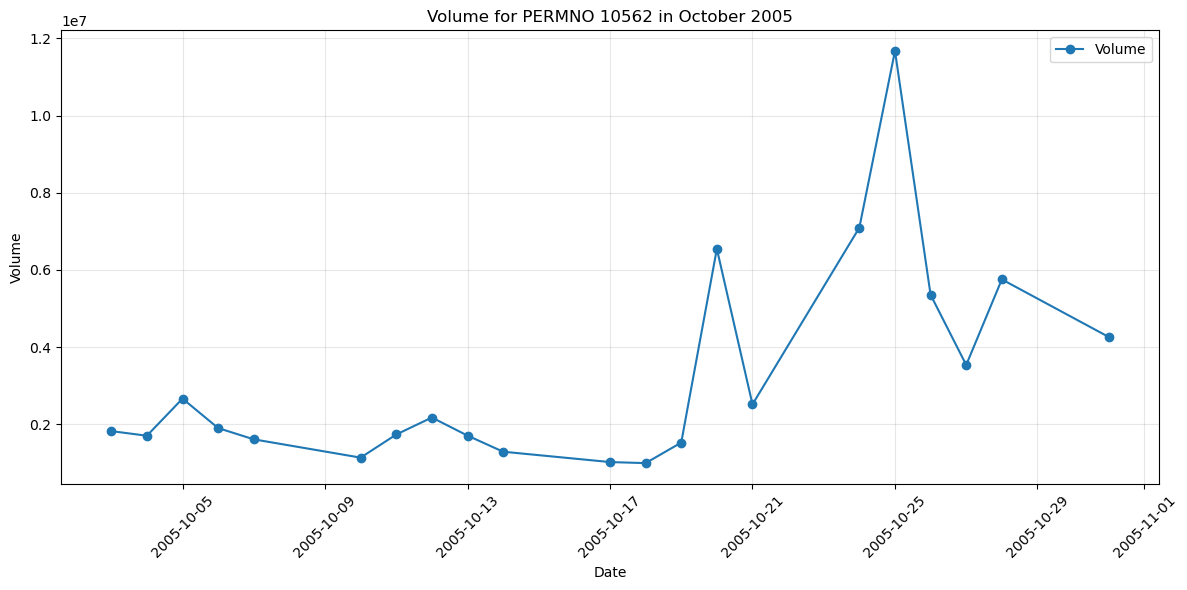

In [21]:
na_month_plot_bypermno(10562,2005,10,df_pro)

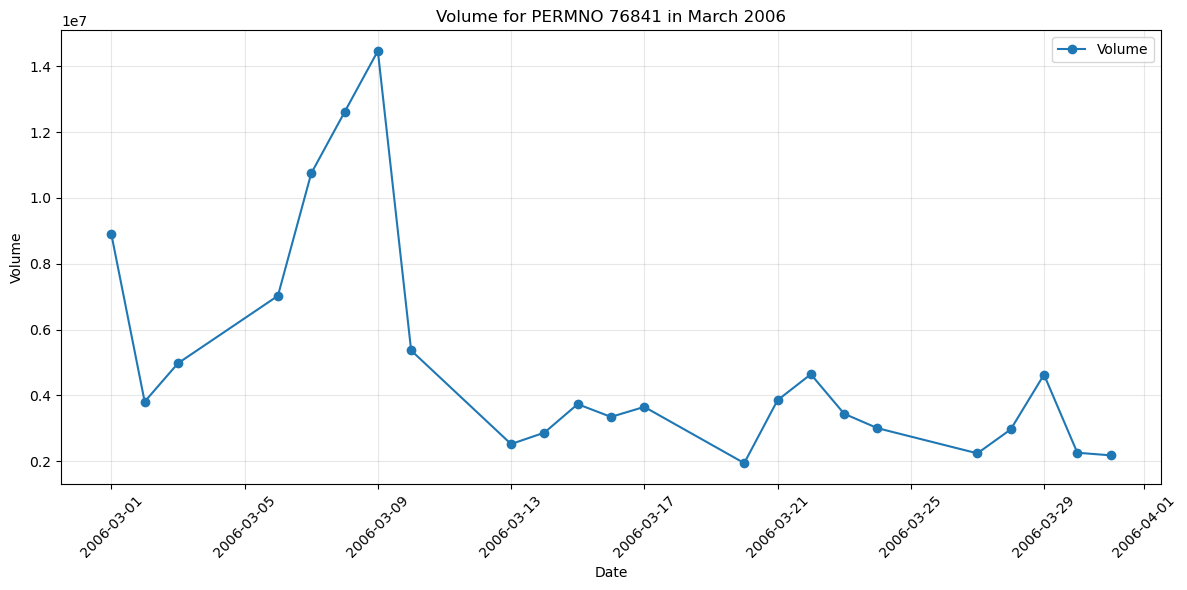

In [22]:
na_month_plot_bypermno(76841,2006,3,df_pro)

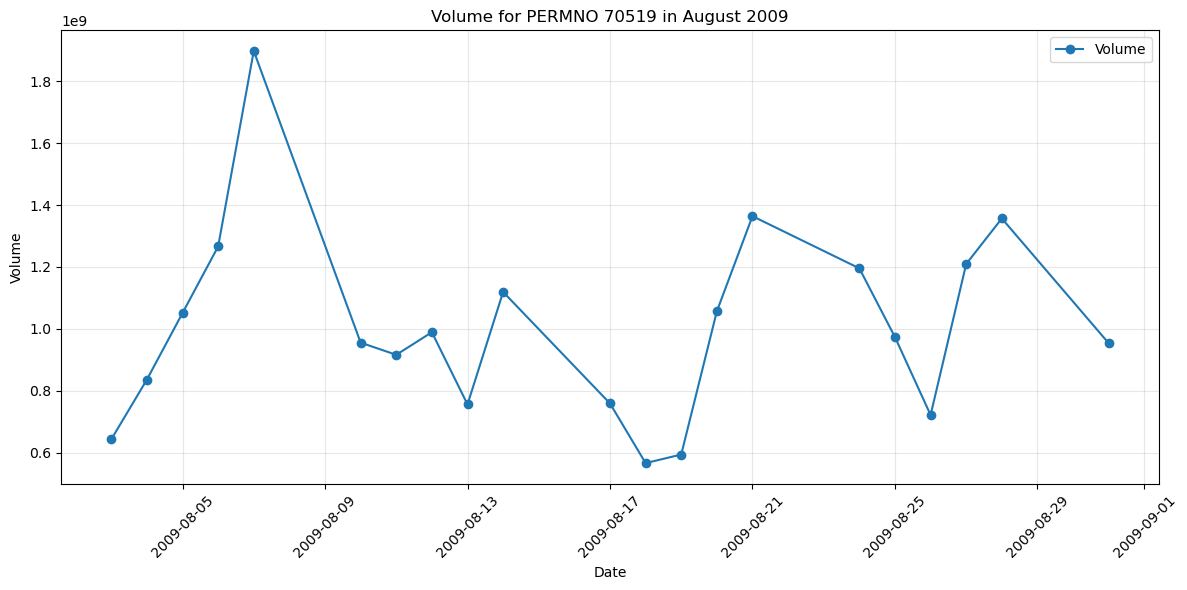

In [23]:
na_month_plot_bypermno(70519,2009,8,df_pro)

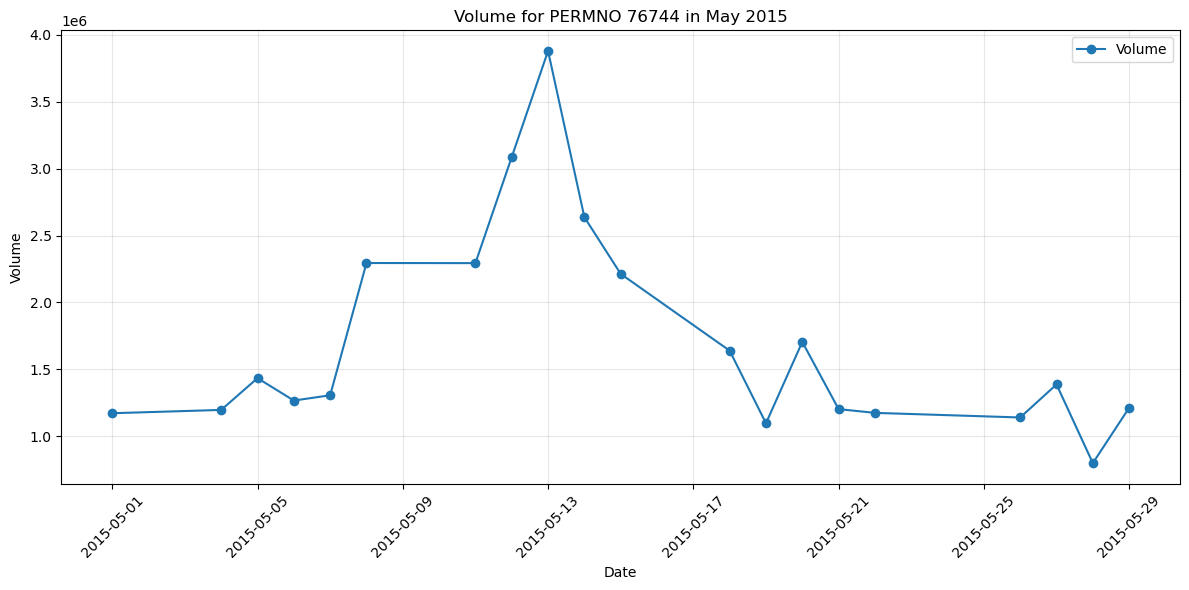

In [24]:
na_month_plot_bypermno(76744,2015,5,df_pro)

**Impute mean from the previous and after index**

In [17]:
df_pro = na_meanfill(param = 'vol', df= df_pro)